FIFA Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

1. Load the csv file and show top 5 records from it.

In [2]:
fifa_df = pd.read_csv('./players_20.csv',index_col='sofifa_id')
fifa_df.head(5)

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


2. Showing each column's name.

In [3]:
#fifa_df.info()
df_col = list(fifa_df.columns)
print(df_col)

['player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'po

3. Show number of rows and columns of this dataset.

In [4]:
#----The dataset contains 18278 rows and 103 columns.
fifa_df.shape

(18278, 103)

Data Cleaning
Remove some redundant features that wont be required for Data Analysis.

In [5]:
#removing redundant columns
redundant_columns = ['player_url','long_name','dob','nation_jersey_number','loaned_from']
fifa_df = fifa_df.drop(redundant_columns, axis = 1)
fifa_df.shape

(18278, 98)

Now let us find the missing values of different columns(features).

In [6]:
null_data = fifa_df.isna().sum().sort_values(ascending=False)
null_data

nation_position          17152
player_tags              16779
gk_positioning           16242
gk_speed                 16242
gk_diving                16242
                         ...  
skill_fk_accuracy            0
skill_curve                  0
skill_dribbling              0
attacking_volleys            0
movement_sprint_speed        0
Length: 98, dtype: int64

4. Show number of players and their countries.

In [7]:
# fifa_df.groupby('nationality').size()
players_df = fifa_df.reset_index()
players_df = players_df.groupby('nationality').count()[['sofifa_id']].rename(columns={'sofifa_id':'Players'})
players_df

,Players
nationality,
Afghanistan,2
Albania,43
Algeria,50
Angola,16
Antigua & Barbuda,7
...,...
Venezuela,66
Vietnam,1
Wales,117


5.  Show top 10 countries and their number of players.

In [8]:
players_df.sort_values(['Players'],ascending=False).head(10)

,Players
nationality,
England,1667
Germany,1216
Spain,1035
France,984
Argentina,886
Brazil,824
Italy,732
Colombia,591
Japan,453


6. Create a bar plot of top 5 countries and their number of players, try to fill green color in bars.

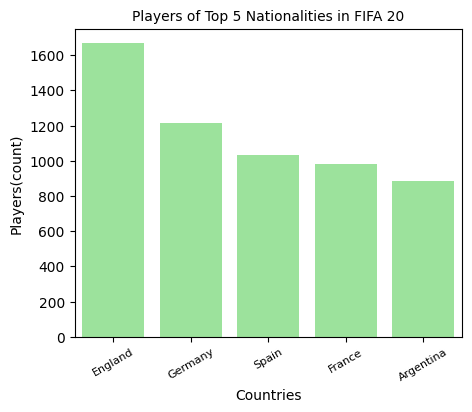

In [9]:
top_5 = players_df.sort_values(['Players'],ascending=False).head(5)
plt.figure(figsize= (5, 4))
ax = sns.barplot(
    data = top_5.reset_index(),
    x = 'nationality',
    y = 'Players',
    color='lightgreen'
)
ax.set_title(label='Players of Top 5 Nationalities in FIFA 20', fontsize=10)
ax.set(xlabel='Countries', ylabel='Players(count)')
plt.xticks(rotation=30, fontsize=8)
#ax.set_xticklabels(labels)
plt.show()

7. Show top 5 players short name and wages.

In [10]:
top_player_df = fifa_df.sort_values(['overall'],ascending=False).head(5)[['short_name','wage_eur']]
top_player_df

,short_name,wage_eur
sofifa_id,,
158023,L. Messi,565000
20801,Cristiano Ronaldo,405000
190871,Neymar Jr,290000
200389,J. Oblak,125000
183277,E. Hazard,470000


8. Show top 5 players short name and wages that are getting highest salaries.

In [11]:
top_salary_df = fifa_df.sort_values(['wage_eur'],ascending=False).head(5)[['short_name','wage_eur']]
top_salary_df

,short_name,wage_eur
sofifa_id,,
158023,L. Messi,565000
183277,E. Hazard,470000
20801,Cristiano Ronaldo,405000
192985,K. De Bruyne,370000
194765,A. Griezmann,370000


9. Create a bar plot of point number 8.

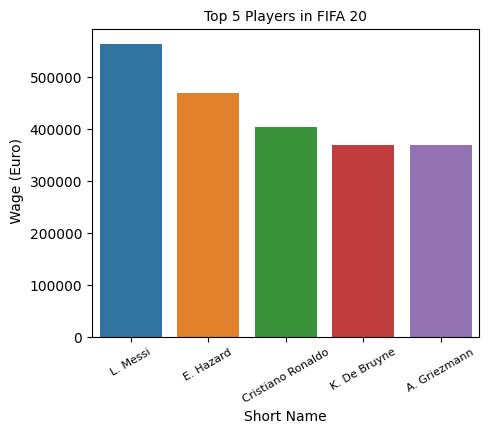

In [12]:
plt.figure(figsize= (5, 4))
ax = sns.barplot(
    data = top_salary_df.reset_index(),
    x = 'short_name',
    y = 'wage_eur' #, color='lightgreen'
)
ax.set_title(label='Top 5 Players in FIFA 20', fontsize=10)
ax.set(xlabel='Short Name', ylabel=' Wage (Euro)')
plt.xticks(rotation=30, fontsize=8)
plt.show()

10. Show top 10 records of Germany

In [13]:
germany_df = fifa_df[fifa_df['nationality'] == 'Germany'].sort_values(['overall'],ascending=False)
germany_df.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
192448,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182521,T. Kroos,29,183,76,Germany,Real Madrid,88,88,57000000,330000,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
188350,M. Reus,30,180,71,Germany,Borussia Dortmund,88,88,56000000,170000,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
167495,M. Neuer,33,193,92,Germany,FC Bayern München,88,88,32000000,155000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178603,M. Hummels,30,191,94,Germany,Borussia Dortmund,87,87,41000000,130000,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3
222492,L. Sané,23,183,75,Germany,Manchester City,86,92,61000000,195000,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
212622,J. Kimmich,24,176,73,Germany,FC Bayern München,86,88,48000000,125000,...,83+3,82+3,82+3,82+3,83+3,81+3,78+3,78+3,78+3,81+3
189596,T. Müller,29,186,75,Germany,FC Bayern München,86,86,43500000,170000,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3
212190,N. Süle,23,195,97,Germany,FC Bayern München,85,90,46500000,115000,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2


11. Show top 5 records of Germany players who have maximum height, weight and wages.

In [14]:
#max_ht_wt_wg_df = germany_df.groupby(['height_cm', 'weight_kg','wage_eur']).max('height_cm')
max_ht_wt_wg_df = germany_df.sort_values(['height_cm','weight_kg','wage_eur'],ascending=False)
max_ht_wt_wg_df.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
236831,A. Seydel,23,199,90,Germany,1. FSV Mainz 05,67,73,1100000,9000,...,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
199833,L. Unnerstall,28,198,103,Germany,PSV,76,78,6500000,14000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200212,M. Esser,31,198,97,Germany,Hannover 96,77,77,5500000,23000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239746,L. Watkowiak,23,197,103,Germany,SV Wehen Wiesbaden,62,68,325000,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179783,R. Fährmann,30,197,98,Germany,Norwich City,80,80,10000000,43000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


12. Show short name and wages of top 5 Germany players.

In [15]:
top_german_df = germany_df.sort_values(['overall'],ascending=False).head(5)[['short_name','wage_eur']]
top_german_df.head(5)

,short_name,wage_eur
sofifa_id,,
192448,M. ter Stegen,250000
188350,M. Reus,170000
167495,M. Neuer,155000
182521,T. Kroos,330000
178603,M. Hummels,130000


13. Show top 5 players who have great shooting skills among all with short name.

In [16]:
shooting_df = fifa_df.sort_values(['shooting'],ascending=False)[['short_name','shooting']]
shooting_df.head(5)

,short_name,shooting
sofifa_id,,
20801,Cristiano Ronaldo,93.0
158023,L. Messi,92.0
202126,H. Kane,91.0
153079,S. Agüero,90.0
159261,F. Quagliarella,89.0


14. Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills.

In [17]:
defending_df = fifa_df.sort_values(['defending'],ascending=False)[['short_name','defending','nationality','club']]
defending_df.head(5)

,short_name,defending,nationality,club
sofifa_id,,,,
138956,G. Chiellini,90.0,Italy,Juventus
203376,V. van Dijk,90.0,Netherlands,Liverpool
201024,K. Koulibaly,89.0,Senegal,Napoli
182493,D. Godín,89.0,Uruguay,Inter
178603,M. Hummels,89.0,Germany,Borussia Dortmund


Creating a data set of Real Madrid Team

In [18]:
real_madrid_df = fifa_df[fifa_df['club'] == 'Real Madrid']
real_madrid_df

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
177003,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,340000,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
155862,Sergio Ramos,33,184,82,Spain,Real Madrid,89,89,31500000,300000,...,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
192119,T. Courtois,27,199,96,Belgium,Real Madrid,88,89,48000000,235000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182521,T. Kroos,29,183,76,Germany,Real Madrid,88,88,57000000,330000,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
200145,Casemiro,27,185,84,Brazil,Real Madrid,87,89,53500000,240000,...,78+3,84+3,84+3,84+3,78+3,79+3,84+3,84+3,84+3,79+3
165153,K. Benzema,31,185,81,France,Real Madrid,87,87,45000000,285000,...,62+3,62+3,62+3,62+3,62+3,58+3,54+3,54+3,54+3,58+3
193041,K. Navas,32,185,80,Costa Rica,Real Madrid,87,87,30500000,195000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197781,Isco,27,176,79,Spain,Real Madrid,86,87,51000000,245000,...,70+3,70+3,70+3,70+3,70+3,67+3,62+3,62+3,62+3,67+3


15. Show wages records of top 5 players of 'Real Madrid' team

In [19]:
real_madrid_df.sort_values(['overall'],ascending=False).head(5)[['short_name','wage_eur']]

,short_name,wage_eur
sofifa_id,,
183277,E. Hazard,470000
177003,L. Modrić,340000
155862,Sergio Ramos,300000
192119,T. Courtois,235000
182521,T. Kroos,330000


16. Show shooting records of top 5 players of 'Real Madrid' team.

In [20]:
real_madrid_df.sort_values(['overall'],ascending=False).head(5)[['short_name','shooting']]

,short_name,shooting
sofifa_id,,
183277,E. Hazard,83.0
177003,L. Modrić,76.0
155862,Sergio Ramos,68.0
192119,T. Courtois,NaN
182521,T. Kroos,80.0


17. Show defending records of top 5 players of 'Real Madrid' team.

In [21]:
real_madrid_df.sort_values(['overall'],ascending=False).head(5)[['short_name','defending']]

,short_name,defending
sofifa_id,,
183277,E. Hazard,35.0
177003,L. Modrić,72.0
155862,Sergio Ramos,87.0
192119,T. Courtois,NaN
182521,T. Kroos,70.0


18. Show nationality records of top 5 players of 'Real Madrid' team.

In [22]:
real_madrid_df.sort_values(['overall'],ascending=False).head(5)[['short_name','nationality']]

,short_name,nationality
sofifa_id,,
183277,E. Hazard,Belgium
177003,L. Modrić,Croatia
155862,Sergio Ramos,Spain
192119,T. Courtois,Belgium
182521,T. Kroos,Germany


Since our data contains 90+ features, we take subset of the dataset by selecting some important features and analyse them.

In [23]:
#Taking subsets of data for analysis
dataset1 = fifa_df[['short_name','age','height_cm','weight_kg','nationality','club','overall','potential','value_eur',
                 'wage_eur','player_positions','preferred_foot','international_reputation','weak_foot',
                 'skill_moves','work_rate','body_type','real_face','release_clause_eur','joined']]
dataset1.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,joined
sofifa_id,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,2004-07-01
20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,2018-07-10
190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,2017-08-03
200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,2014-07-16
183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,2019-07-01


Plotting a correlation heatmap to find relations between the features.
We obsercan see that there is high correlation between the following features:

(1)wage and value, 
(2)release clause and value
(3)release cause and wage

Similarly there is no correlation between the following features:
(1) height with value, potential, wage and release clause
(2) weight with the same

<AxesSubplot:>

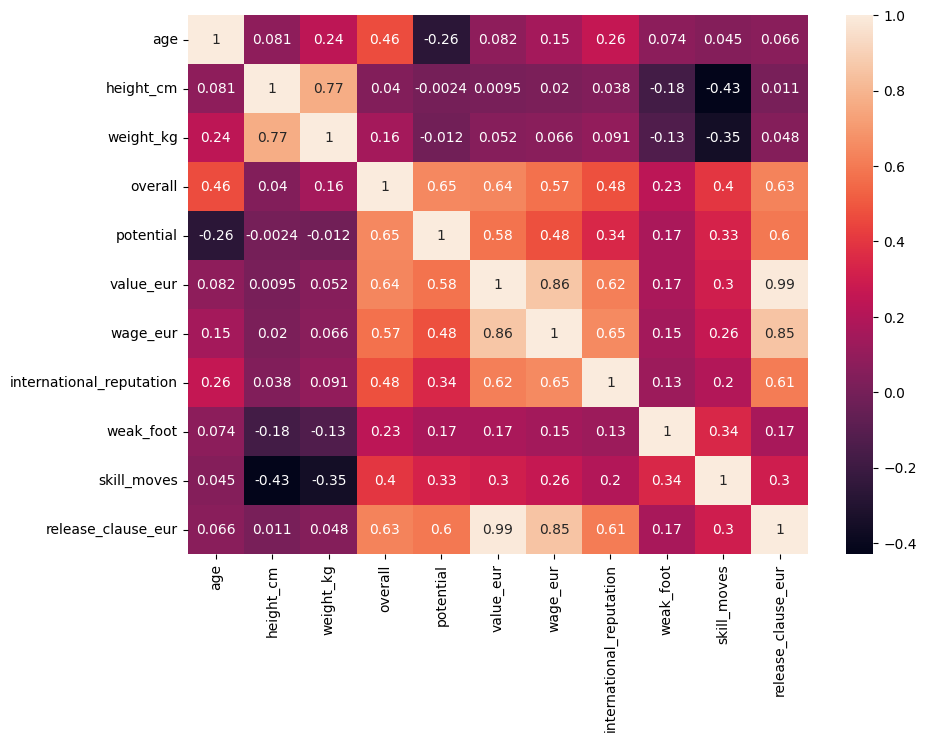

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset1.corr(), annot=True, cbar=True)

Separate numerical columns and plot them into boxplots to identify the outliers in our dataset, which can be seen as dots or circles below.

In [25]:
numeric_features = ['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','international_reputation','weak_foot','skill_moves','release_clause_eur']
numeric_dataset1 = dataset1[numeric_features]

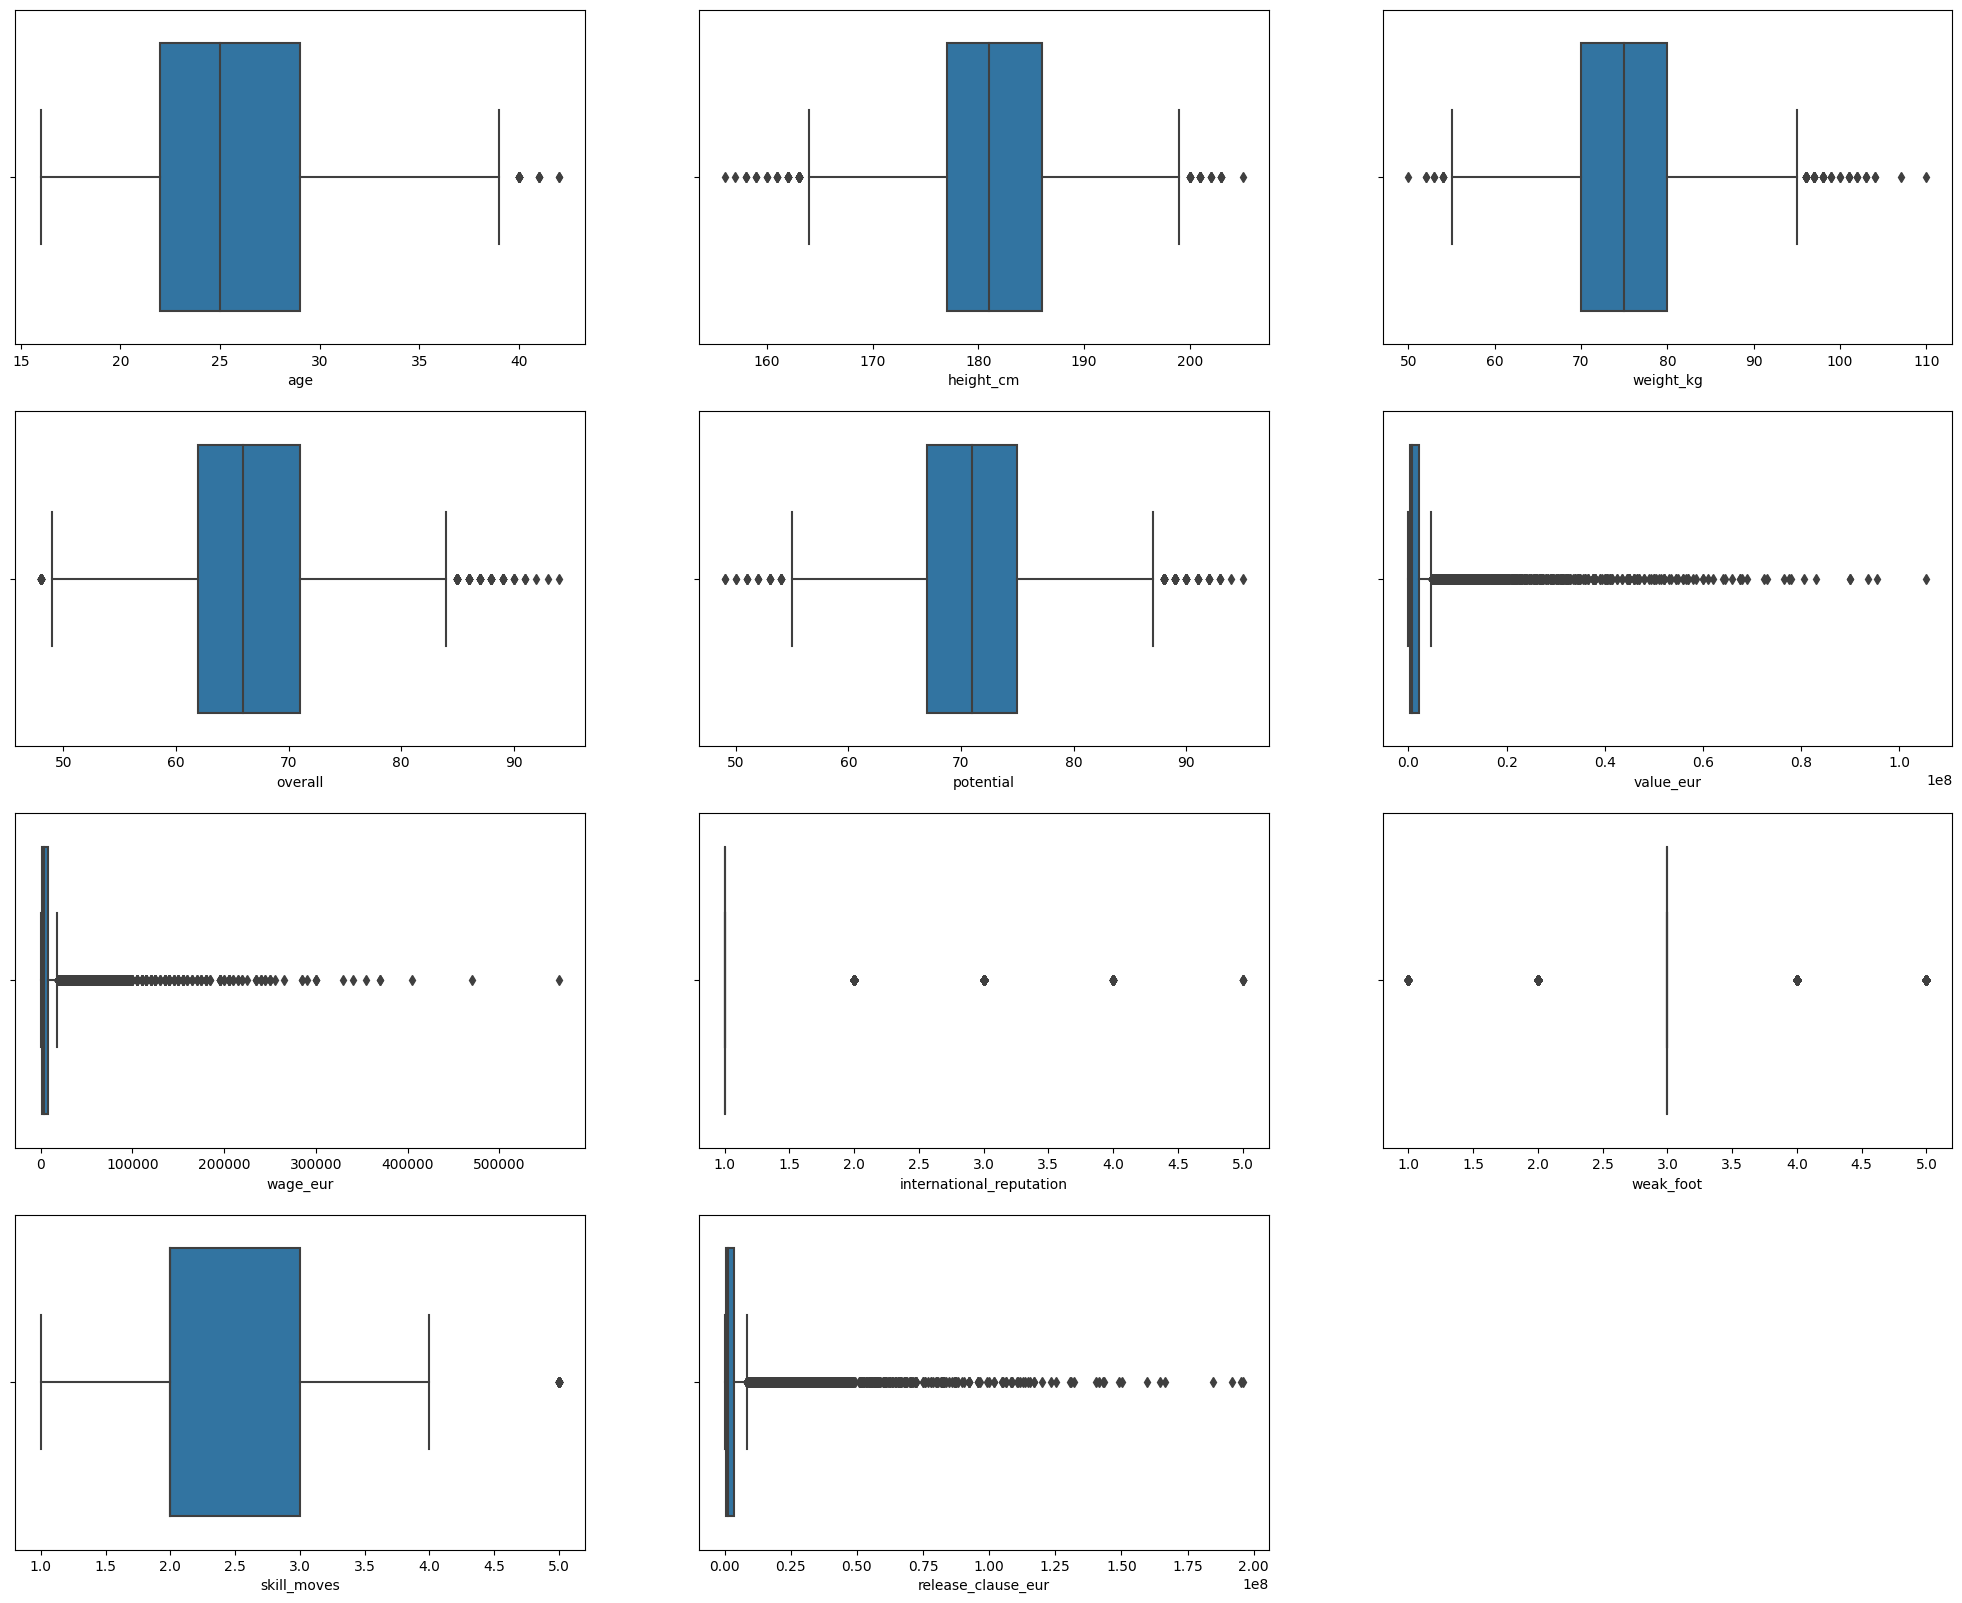

In [26]:
plt.figure(figsize=(25,20))
for i in enumerate(numeric_features):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(x=i[1],data=numeric_dataset1)

Plotting their histograms to look at their distributions

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height_cm'}>,
        <AxesSubplot:title={'center':'weight_kg'}>],
       [<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'potential'}>,
        <AxesSubplot:title={'center':'value_eur'}>],
       [<AxesSubplot:title={'center':'wage_eur'}>,
        <AxesSubplot:title={'center':'international_reputation'}>,
        <AxesSubplot:title={'center':'weak_foot'}>],
       [<AxesSubplot:title={'center':'skill_moves'}>,
        <AxesSubplot:title={'center':'release_clause_eur'}>,
        <AxesSubplot:>]], dtype=object)

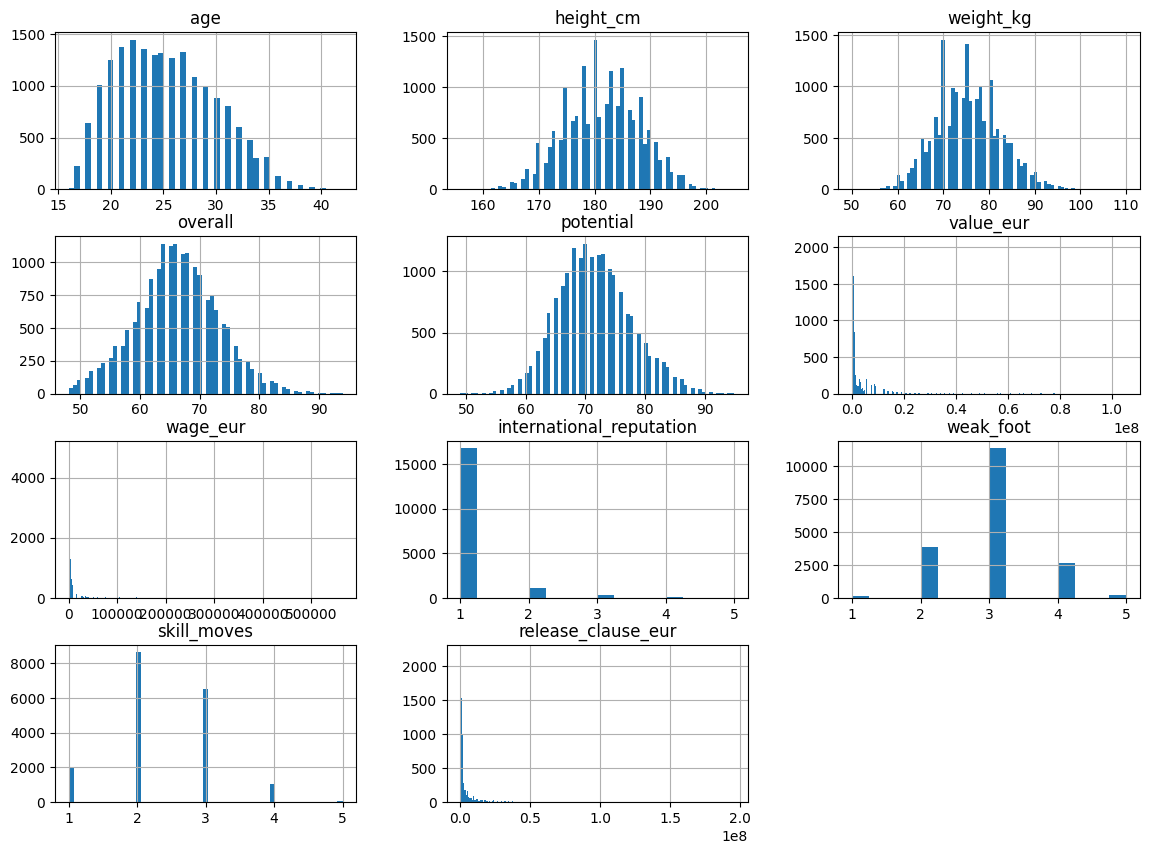

In [27]:
#histograms of numerical features
dataset1.hist(bins='auto', figsize=(14, 10))

Exploring some Features

Age - 

c:\Users\devms\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


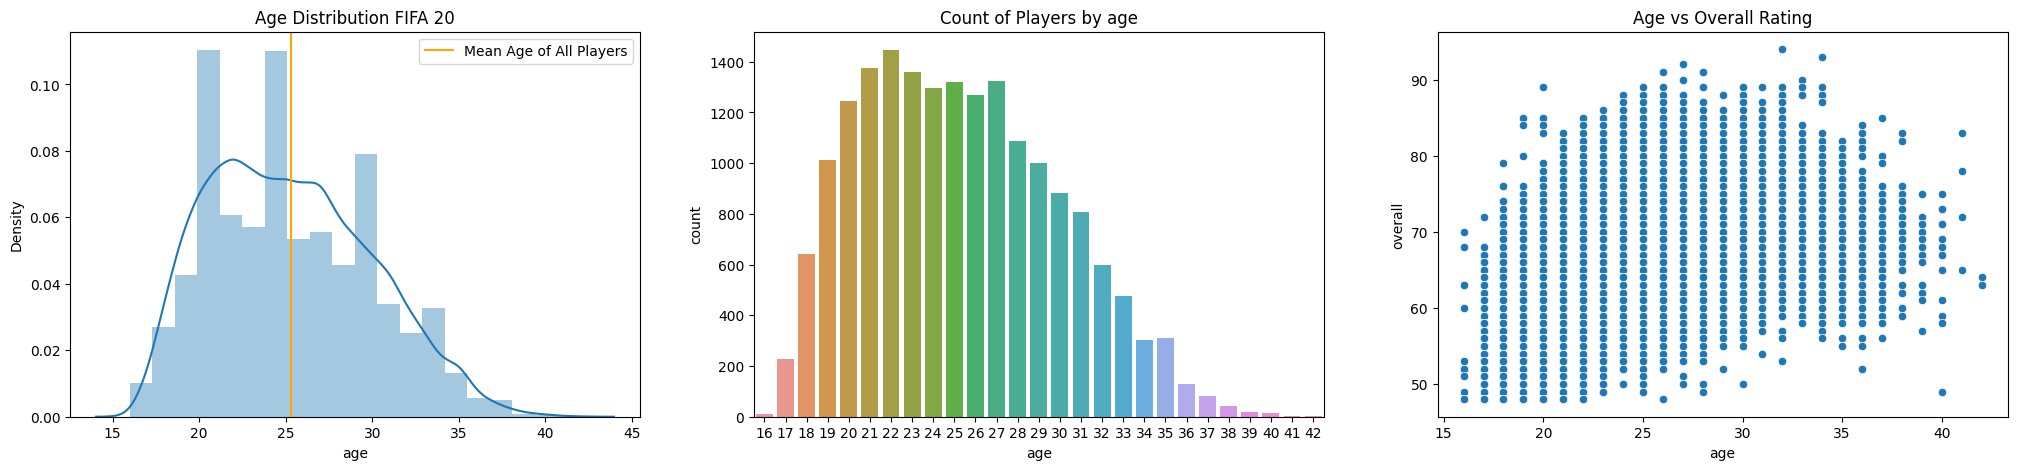

In [28]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.title('Age Distribution FIFA 20')
sns.distplot(a=dataset1['age'], kde=True, bins=20)
plt.axvline(x=np.mean(dataset1['age']),c='orange',label='Mean Age of All Players')
plt.legend()

plt.subplot(1,3,2)
plt.title('Count of Players by age')
sns.countplot(x='age', data=dataset1)

plt.subplot(1,3,3)
plt.title('Age vs Overall Rating')
#plt.scatter(dataset1['age'],dataset1['overall'])
sns.scatterplot(x='age',y='overall',data=dataset1)

plt.show()

# plt.subplot(1,3,2)
# ax = sns.countplot(x='age', data=dataset1)
# ax.set_title(label='Count of Players by age', fontsize=20)
# ax.set_xlabel(xlabel='Age')
# ax.set_ylabel(ylabel='Count')


The age of maximum players lie between 20 to 27 years with a mean of around 25 years.
The minimum age of the players in the game is 16 years whereas the maximum age is 42 years.
From scatterplot, we can infer that no definite pattern is visible since the plot is vastly spread.
While age doesnt linearly effect rating, some trends can be observed like minimum rating generally increases with age and maximum of rating first increases and then decreases, with peak at 32 (Messi).

Height, Weight and BMI

c:\Users\devms\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\devms\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\devms\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `dat

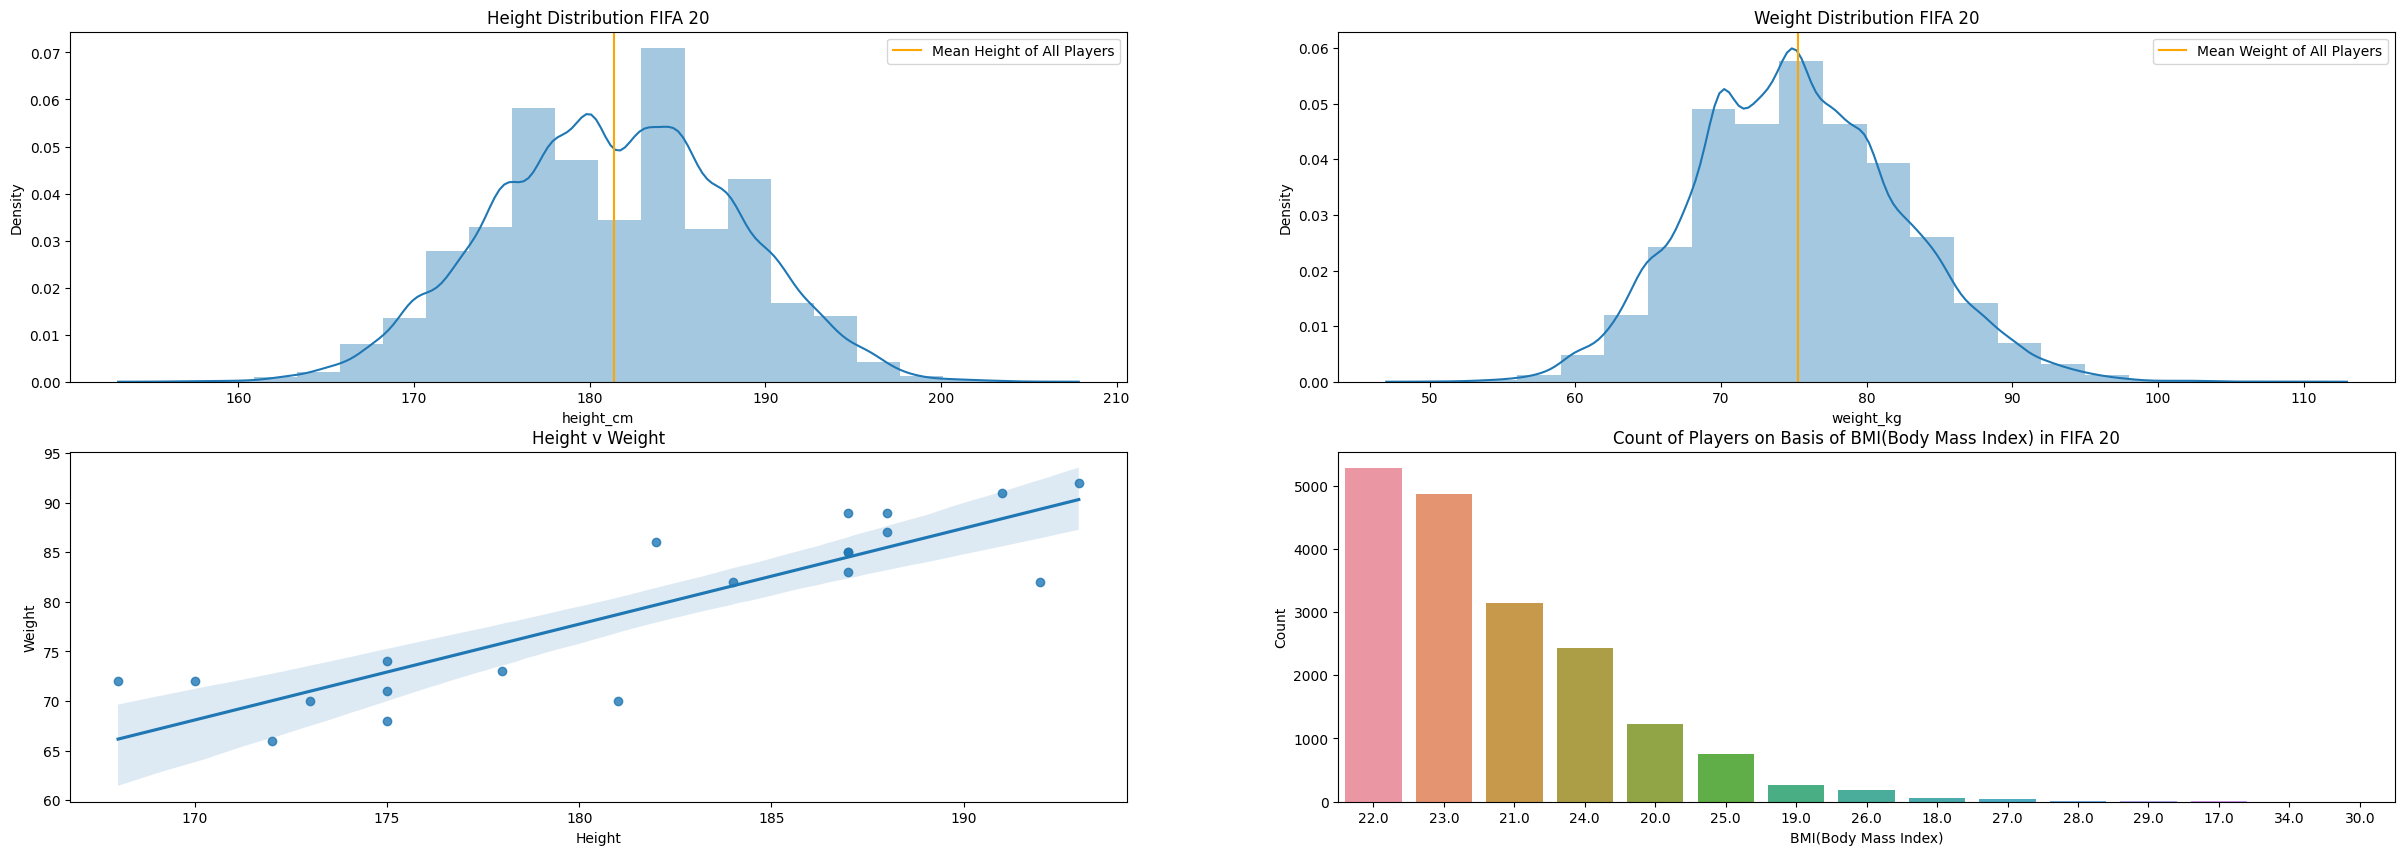

In [29]:
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
plt.title('Height Distribution FIFA 20')
sns.distplot(a=dataset1['height_cm'], kde=True, bins=20)
plt.axvline(x=np.mean(dataset1['height_cm']),c='orange',label='Mean Height of All Players')
plt.legend()

plt.subplot(2,2,2)
plt.title('Weight Distribution FIFA 20')
sns.distplot(a=dataset1['weight_kg'], kde=True, bins=20)
plt.axvline(x=np.mean(dataset1['weight_kg']),c='orange',label='Mean Weight of All Players')
plt.legend()

plt.subplot(2,2,3)
x=dataset1.head(20)['height_cm']
y=dataset1.head(20)['weight_kg']
sns.regplot(x,y)
plt.title('Height v Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

# Calculating BMI
dataset1['bmi'] = dataset1['weight_kg'] // (dataset1['height_cm']/100)**2
plt.subplot(2,2,4)
ax = sns.countplot(x='bmi', data=dataset1, order=dataset1.bmi.value_counts().iloc[:20].index)
ax.set_title(label='Count of Players on Basis of BMI(Body Mass Index) in FIFA 20')
ax.set_xlabel(xlabel='BMI(Body Mass Index)')
ax.set_ylabel(ylabel='Count')

plt.show()

We can observe that (1) Height and weight are linearly dependant and (2) 22 is the most common BMI

Nationality - Plotting the count of players from different nationalities 

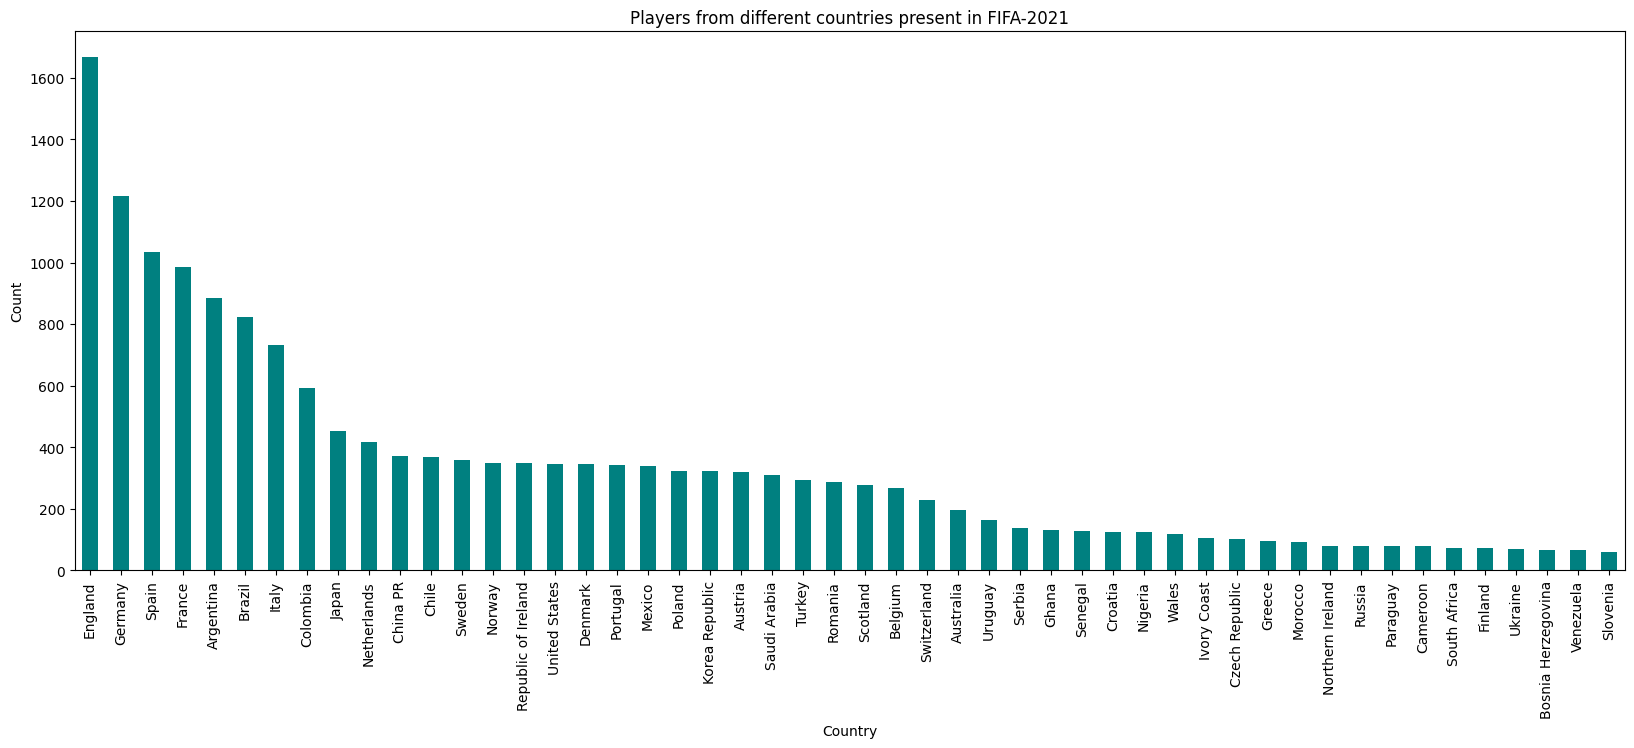

In [30]:
plt.figure(figsize = (20,7))
dataset1['nationality'].value_counts().head(50).plot.bar(color = 'teal')
plt.title('Players from different countries present in FIFA-2021')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Proportion of right-foot players vs left-foot players

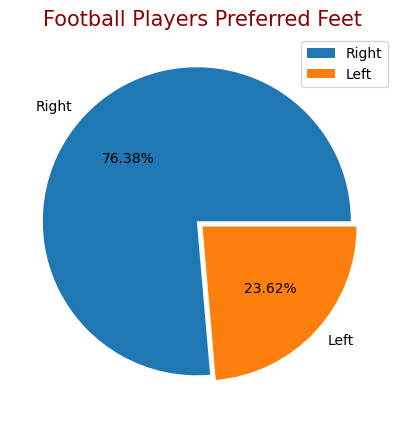

In [31]:
pref_foot = fifa_df['preferred_foot'].value_counts()
# preferred_foot_labels = fifa_df["preferred_foot"].value_counts().index
foot_labels = ['Right','Left']
explode = (0.05, 0.00)

plt.figure(figsize = (5,5))
plt.pie(pref_foot, labels = foot_labels, explode=explode, autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',color = 'darkred',fontsize = 15)
plt.legend()
#pref_foot.plot(kind='pie',y = 'preferred_foot', labels = foot_labels, autopct='%1.1f%%',explode=explode )

Clubs, Overall rating and Wage

In [32]:
avg_wage_overall_df = fifa_df.groupby("club", as_index=False)["wage_eur","overall"].mean()
avg_wage_overall_df.sort_values(by="wage_eur",inplace=True,ascending=False)
avg_wage_overall_df.head(10)

C:\Users\devms\AppData\Local\Temp\ipykernel_20940\971718328.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_wage_overall_df = fifa_df.groupby("club", as_index=False)["wage_eur","overall"].mean()


,club,wage_eur,overall
505,Real Madrid,162242.424242,80.121212
224,FC Barcelona,150000.000000,78.363636
400,Manchester City,120727.272727,77.000000
350,Juventus,113636.363636,80.060606
226,FC Bayern München,109391.304348,81.304348
401,Manchester United,87090.909091,76.848485
141,Chelsea,85030.303030,77.060606
389,Liverpool,80818.181818,75.848485
626,Tottenham Hotspur,78878.787879,76.484848
462,Paris Saint-Germain,72606.060606,75.909091


<Figure size 1200x500 with 0 Axes>

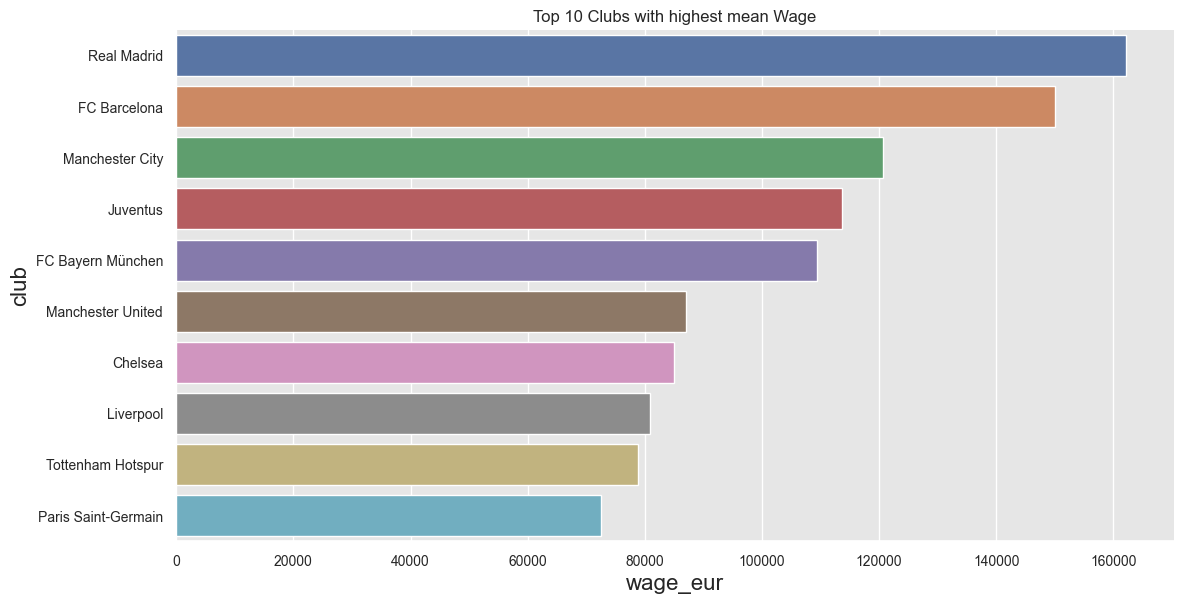

In [33]:
plt.figure(figsize=(12,5))
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':16,
            'xtick.labelsize':10,
            'ytick.labelsize':10})
sns.catplot(y="club",
            x="wage_eur",data=avg_wage_overall_df.head(10),
           height=6,kind="bar",aspect=2)
plt.title("Top 10 Clubs with highest mean Wage");

Analysisng the primary traits of goal keepers: speed, positioning, reflexes, diving and handling.

In [34]:
fifa_gk=fifa_df.loc[fifa_df['team_position'] == "GK"]
fifa_gk=fifa_gk.drop(['dob','pace','shooting','passing','dribbling','defending','physic','player_traits',\
                      'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm',\
                      'cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb'],axis=1)
fifa_gk.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192448,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212831,Alisson,26,191,91,Brazil,Liverpool,89,91,58000000,155000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193080,De Gea,28,192,82,Spain,Manchester United,89,90,56000000,205000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210257,Ederson,25,188,86,Brazil,Manchester City,88,91,54500000,185000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


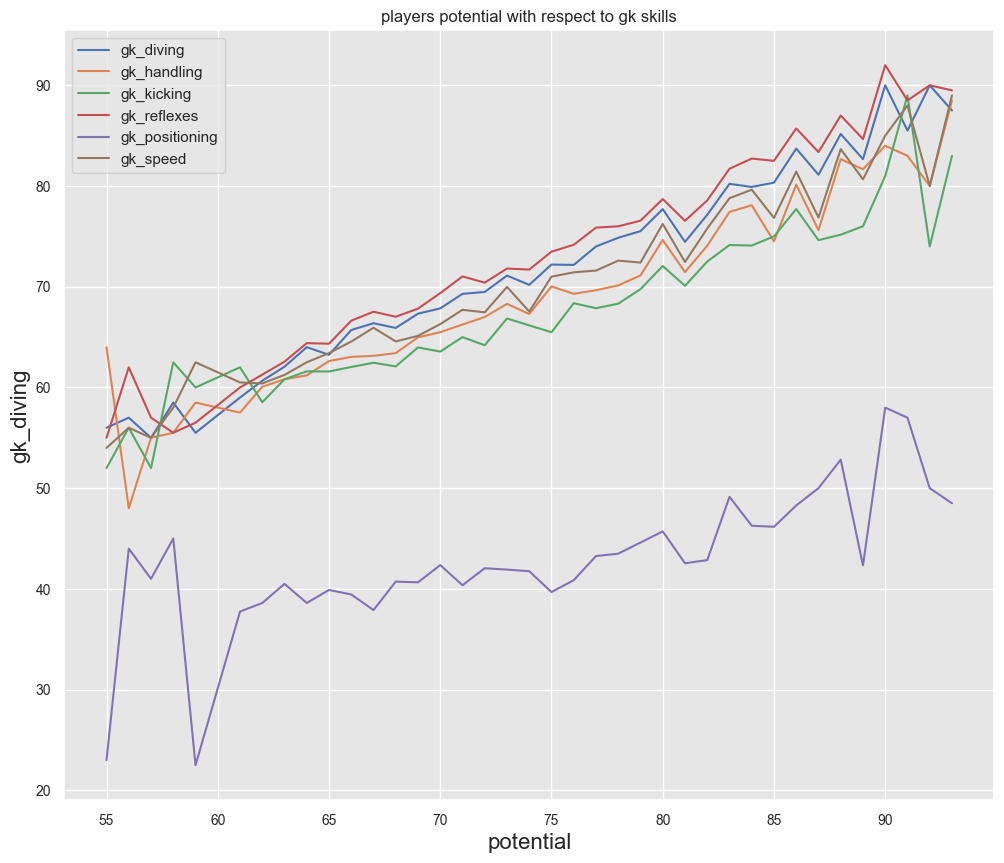

In [35]:
rcParams['figure.figsize']= 12,10
sns.lineplot(x='potential',y='gk_diving', data=fifa_gk,legend='brief',ci=None).set_title('players potential with respect to gk skills')
sns.lineplot(x='potential',y='gk_handling',data=fifa_gk,legend='brief',ci=None)
sns.lineplot(x='potential',y='gk_kicking',data=fifa_gk,legend='brief',ci=None)
sns.lineplot(x='potential',y='gk_reflexes',data=fifa_gk,legend='brief',ci=None)
sns.lineplot(x='potential',y='gk_speed',data=fifa_gk,legend='brief',ci=None)
sns.lineplot(x='potential',y='gk_positioning',data=fifa_gk,legend='brief',ci=None).set_ylabel('diving, handling, kicking , positioning, speed and reflexes')
plt.legend(['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_positioning','gk_speed'])
plt.show()

Diving and reflexes are higher for all the goal keepers, compared to other traits.

Analysis for players

In [36]:
fifa_players = fifa_df.loc[fifa_df['team_position'] != "GK"]
fifa_players.head()
# Drop the insignificant columns which have NaN values
fifa_players=fifa_players.drop(['dob','work_rate','real_face','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed',\
                     'gk_positioning','player_traits'],axis=1)
fifa_players.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
192985,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


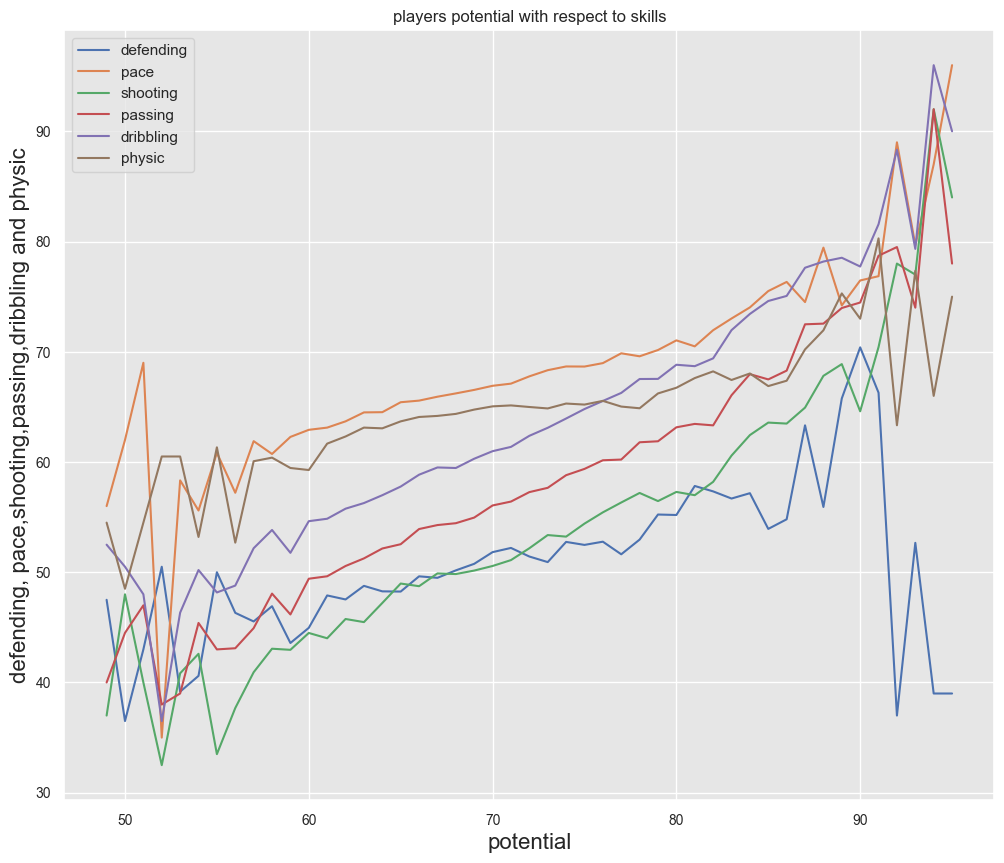

In [37]:
rcParams['figure.figsize']= 12,10
sns.lineplot(x='potential' ,y='defending', data=fifa_players,legend='brief',ci=None).set_title('players potential with respect to skills')
sns.lineplot(x='potential',y='pace',data=fifa_players,legend='brief',ci=None)
sns.lineplot(x='potential',y='shooting',data=fifa_players,legend='brief',ci=None)
sns.lineplot(x='potential',y='passing',data=fifa_players,legend='brief',ci=None)
sns.lineplot(x='potential',y='dribbling',data=fifa_players,legend='brief',ci=None)
sns.lineplot(x='potential',y='physic',data=fifa_players,legend='brief',ci=None).set_ylabel('defending, pace,shooting,passing,dribbling and physic')
plt.legend(['defending','pace','shooting','passing','dribbling','physic'])
plt.show()

We can see that players have steady increase in traits like dribbling,pace & shooting above the potential of 60, and less defending skills.